In [1130]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [1131]:
# ReLu function
def activation_ReLu(value):
    if value > 0:
        return value
    else:
        return 0

# partial derivative of ReLu for the backpropagation
def activation_ReLu_part_deriv(value):
    if value > 0:
        return 1
    else:
        return 0   

In [1132]:
# lock down the randomness
#np.random.seed(123)

def generate_test_data():
    result = []

    for x in range(3000):
        n1 = np.random.randint(-5, 5)
        n2 = np.random.randint(-10, 10)
        n3= n1 ** 2 + n2 + np.random.randint(-3, 3)
        n3 = int(n3)

        result.append([n1, n2, n3])

    return result

In [1133]:
print(generate_test_data())

[[-3, -4, 3], [1, -1, 2], [-5, -6, 18], [1, -8, -10], [1, -7, -8], [-2, -5, 1], [-1, -7, -5], [1, 0, -2], [-5, -7, 19], [1, 2, 3], [2, 9, 13], [0, 8, 7], [-2, -8, -3], [0, -9, -9], [-2, 3, 6], [-5, -8, 18], [-4, -6, 9], [-4, -2, 16], [-3, -8, -1], [-3, 4, 11], [0, -3, -5], [-4, 4, 19], [-4, -6, 12], [-5, -6, 19], [4, 6, 19], [2, -3, 1], [4, 3, 19], [1, -8, -6], [-4, -3, 13], [2, -6, -3], [-2, 6, 12], [-1, 2, 1], [1, 1, -1], [4, -6, 10], [-4, -1, 13], [2, -2, 2], [-5, -9, 13], [-3, -9, 1], [3, -8, 2], [3, -6, 4], [3, 8, 19], [0, 7, 6], [1, 5, 6], [0, 3, 0], [-3, 4, 10], [-3, -3, 6], [-2, -2, 0], [-1, 5, 7], [4, -4, 9], [4, -6, 9], [3, 9, 15], [-3, 6, 16], [-3, -2, 7], [4, 4, 17], [3, 6, 12], [-3, 9, 19], [0, -7, -5], [-4, 0, 18], [-1, -4, -2], [2, -6, -2], [3, 8, 19], [4, 0, 13], [-1, -10, -8], [-4, 9, 22], [-5, -5, 18], [-4, -6, 8], [-2, -9, -6], [1, -2, -2], [1, -2, 1], [-2, 3, 9], [2, 7, 13], [4, -10, 7], [-2, 7, 12], [4, -3, 10], [-3, 3, 9], [4, -2, 12], [-2, 4, 8], [2, -8, -3], [4,

In [1134]:
# Initialising weights and biases
# Randomizing weights and biases
# Weights: floats between -10 and 10 (2 decimals)
# Biases: floats between -5 and 5 (2 decimals)
weights = []
biases = []

for i in range(6):
    weight = round(random.uniform(-10,10), 2)
    weights.append(weight)
    
w1 = weights[0]
w2 = weights[1]
w3 = weights[2]
w4 = weights[3]
w5 = weights[4]
w6 = weights[5]

# Biases
for i in range(3):
    bias = round(random.uniform(-5,5), 2)
    biases.append(bias)

bias1 = biases[0]
bias2 = biases[1]
bias3 = biases[2]

# save the original weights and biases for comparison in the end
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# input values and target value
#input1 = 1
#input2 = 0
#true_value = 2

# learning rate
LR = 0.005
epochs = 500

# Using the previously defined function to generate data instead
data = generate_test_data()

# Let's scale our values with min/max -scaling
data=(data - np.min(data))/(np.max(data)-np.min(data))

# Points for plotting loss later
loss_points = []

for epoch in range(epochs):

    epoch_losses = []

    for row in data:
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]
        # Forward pass
        node_1_output = input1 * w1 + input2 * w3 + bias1
        node_1_output = activation_ReLu(node_1_output)
        
        node_2_output = input1 * w2 + input2 * w4 + bias2
        node_2_output = activation_ReLu(node_2_output)

        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)

        predicted_value = node_3_output
        # This will probably crash if the loss value gets too high
        # replace with Numpy64 if needed
        loss = (predicted_value - true_value) ** 2

        epoch_losses.append(loss)

        # Back propagation - last layer
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5
        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6
        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # Back propagation - next layer
        # From this point the chain rule is needed

        # Weights 1 to 4:
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        # Biases 1 and 2:
        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_part_deriv(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_part_deriv(input1 * w2 + input2 * w4 + bias2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # Updating the weights and biases
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    average_loss = sum(epoch_losses) / len(epoch_losses)
    # after each epoch, print the current weights and biases
    loss_points.append(average_loss)
    print(f"Epoch: {epoch +1}, loss = {average_loss}")

    """print(f"W1: {new_w1}")
    print(f"W2: {new_w2}")
    print(f"W3: {new_w3}")
    print(f"W4: {new_w4}")
    print(f"W5: {new_w5}")
    print(f"W6: {new_w6}")
    print(f"B1: {new_b1}")
    print(f"B2: {new_b2}")
    print(f"B3: {new_b3}")"""

Epoch: 1, loss = 0.23660882269220604
Epoch: 2, loss = 0.05486070239376008
Epoch: 3, loss = 0.04537423453183577
Epoch: 4, loss = 0.04008404962420982
Epoch: 5, loss = 0.03680552631821417
Epoch: 6, loss = 0.0346164688397625
Epoch: 7, loss = 0.03307734003893042
Epoch: 8, loss = 0.03193646635462149
Epoch: 9, loss = 0.03105491809668816
Epoch: 10, loss = 0.03035090852011203
Epoch: 11, loss = 0.02977419670626054
Epoch: 12, loss = 0.029287793694566584
Epoch: 13, loss = 0.02887184926766912
Epoch: 14, loss = 0.02851081649179635
Epoch: 15, loss = 0.02819351312540072
Epoch: 16, loss = 0.0279118476613382
Epoch: 17, loss = 0.027659807969087784
Epoch: 18, loss = 0.027432808622750136
Epoch: 19, loss = 0.027227263867285124
Epoch: 20, loss = 0.027040304703914924
Epoch: 21, loss = 0.026869588941044777
Epoch: 22, loss = 0.026713171623124855
Epoch: 23, loss = 0.026569414913191106
Epoch: 24, loss = 0.026436923955674672
Epoch: 25, loss = 0.026314500041457103
Epoch: 26, loss = 0.026201105484277412
Epoch: 27, l

In [1135]:
print("-------------------")
print("Original weights/biases")
print(f"W1: {original_w1}")
print(f"W2: {original_w2}")
print(f"W3: {original_w3}")
print(f"W4: {original_w4}")
print(f"W5: {original_w5}")
print(f"W6: {original_w6}")
print(f"B1: {original_b1}")
print(f"B2: {original_b2}")
print(f"B3: {original_b3}")

print("-------------------")
print("Final weights/biases")
print(f"W1: {w1}")
print(f"W2: {w2}")
print(f"W3: {w3}")
print(f"W4: {w4}")
print(f"W5: {w5}")
print(f"W6: {w6}")
print(f"B1: {bias1}")
print(f"B2: {bias2}")
print(f"B3: {bias3}")

-------------------
Original weights/biases
W1: 5.47
W2: -5.51
W3: -1.56
W4: -1.8
W5: 0.6
W6: 6.56
B1: 1.86
B2: 3.7
B3: 4.89
-------------------
Final weights/biases
W1: 3.120315123701398
W2: -6.127316213955235
W3: -2.931836077501759
W4: -2.3918632776903235
W5: -0.345152859297594
W6: 6.194368147535694
B1: 0.8122856095706604
B2: 1.1370573658404735
B3: 0.7108200853020531


<function matplotlib.pyplot.show(close=None, block=None)>

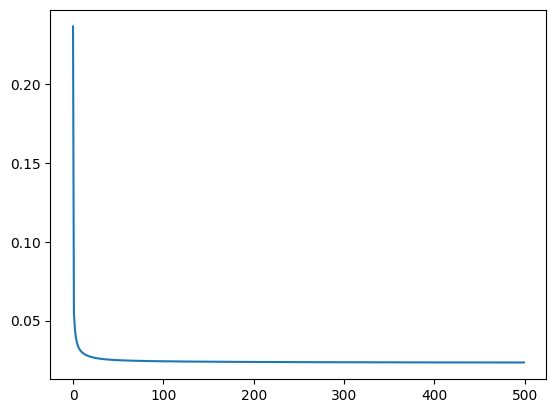

In [1136]:
plt.plot(loss_points)
plt.show

In [1137]:
# Prediction is just doing the forward pass step
def predict(x1, x2):
    node_1_output = x1 * w1 + x2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)
    
    node_2_output = x1 * w2 + x2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)

    return node_3_output

In [1138]:
predict(1, 1)

0.3654033028789618